In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Desktop/Charma/HAM10000_metadata.csv")
df
df_data=df

In [3]:
df_data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [4]:
df_data.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

<Axes: xlabel='dx', ylabel='count'>

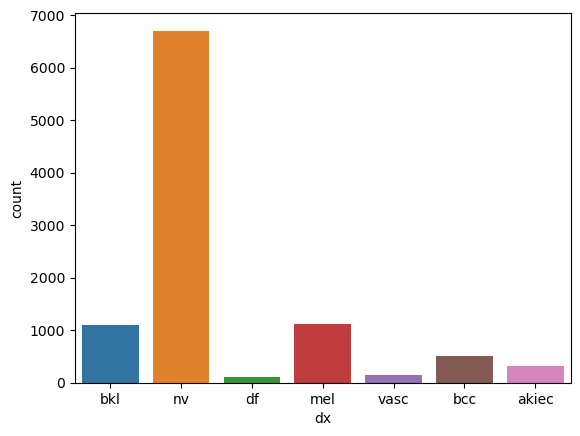

In [5]:
sns.countplot(x=df_data['dx'])

In [6]:
k=df_data["dx"].unique()
print(k)
for i in k:
    print(i,"------>",df_data[df_data["dx"]==i]["dx"].count())

['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
bkl ------> 1099
nv ------> 6705
df ------> 115
mel ------> 1113
vasc ------> 142
bcc ------> 514
akiec ------> 327


In [7]:
df_data[df_data["image_id"]=='ISIC_0027419']['image_id'].count()

1

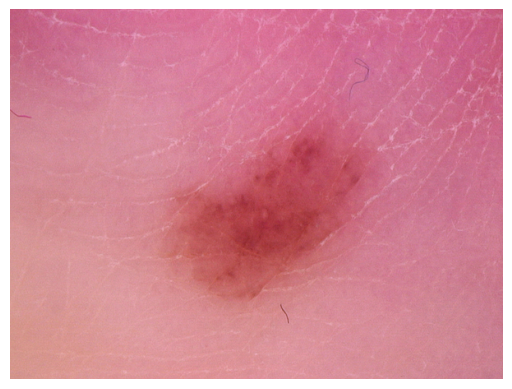

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image_name, folder_path):
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_name)

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open the image using PIL
        img = Image.open(image_path)
        # Display the image using matplotlib
        plt.imshow(img)
        plt.axis('off')  # Turn off axis labels
        plt.show()
    else:
        print(f"Image '{image_name}' not found in the folder '{folder_path}'.")

# Example usage:
image_name_to_display = "ISIC_0024322.jpg"  # Replace with your image name
folder_path_containing_image = "D:/Desktop/Charma/HAM10000_images_part_1"  # Replace with your folder path

display_image(image_name_to_display, folder_path_containing_image)


In [9]:
# this will tell us how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()

# now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [10]:

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [11]:
df_data['duplicates'].value_counts()

duplicates
no_duplicates     5514
has_duplicates    4501
Name: count, dtype: int64

In [12]:
#filtering out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,no_duplicates
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,no_duplicates
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,no_duplicates
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,no_duplicates
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,no_duplicates
...,...,...,...,...,...,...,...,...
9988,HAM_0001036,ISIC_0027588,akiec,histo,50.0,female,face,no_duplicates
9990,HAM_0004462,ISIC_0027334,akiec,histo,45.0,male,trunk,no_duplicates
9991,HAM_0001152,ISIC_0030133,akiec,histo,65.0,male,face,no_duplicates
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face,no_duplicates


In [13]:
from sklearn.model_selection import train_test_split
# we will now create a val set using df because we are sure that none of these images have augmented duplicates in the train set
y = df['dx']

_, df_val = train_test_split(df, test_size=0.17, random_state=101, stratify=y)

df_val.shape

(938, 8)

In [15]:
len(df_val)

938

In [16]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

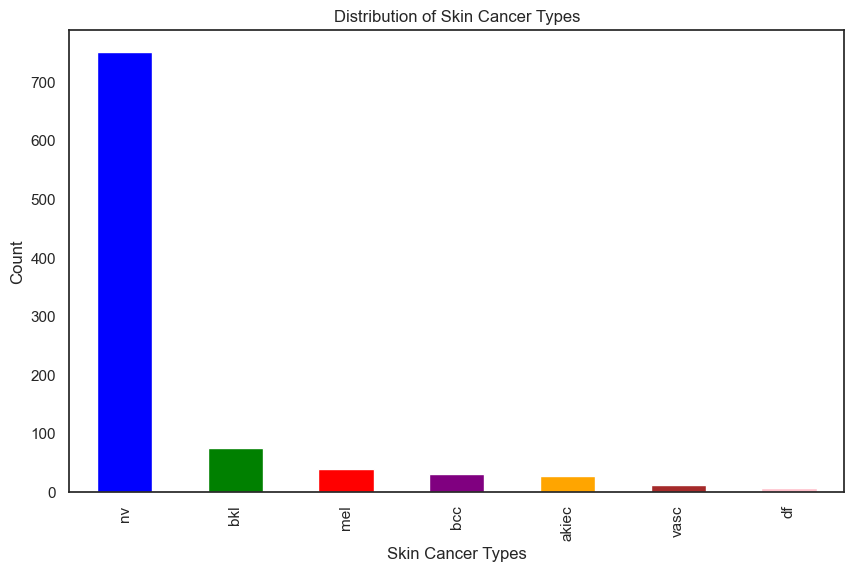

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_val is your DataFrame
sns.set(style="white")
plt.figure(figsize=(10, 6))

# Use value_counts and plot a bar chart
df_val['dx'].value_counts().plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])

plt.title('Distribution of Skin Cancer Types')
plt.xlabel('Skin Cancer Types')
plt.ylabel('Count')

plt.show()

In [18]:
# This set will be df_data excluding all rows that are in the val set

# This function identifies if an image is part of the train or val set.
def identify_val_rows(x):
    # create a list of all the lesion_id's in the val set
    val_list = list(df_val['image_id'])
    
    if str(x) in val_list:
        return 'val'
    else:
        return 'train'

# identify train and val rows

# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_val_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']
df



,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
10,HAM_0001396,ISIC_0025276,bkl,histo,55.0,female,trunk,no_duplicates
15,HAM_0007207,ISIC_0031326,bkl,histo,65.0,male,back,no_duplicates
20,HAM_0006071,ISIC_0032343,bkl,histo,70.0,female,face,no_duplicates
33,HAM_0005612,ISIC_0024981,bkl,histo,80.0,male,scalp,no_duplicates
34,HAM_0005388,ISIC_0027815,bkl,histo,80.0,male,chest,no_duplicates
...,...,...,...,...,...,...,...,...
9988,HAM_0001036,ISIC_0027588,akiec,histo,50.0,female,face,no_duplicates
9990,HAM_0004462,ISIC_0027334,akiec,histo,45.0,male,trunk,no_duplicates
9991,HAM_0001152,ISIC_0030133,akiec,histo,65.0,male,face,no_duplicates
10001,HAM_0000020,ISIC_0031922,akiec,histo,60.0,female,face,no_duplicates


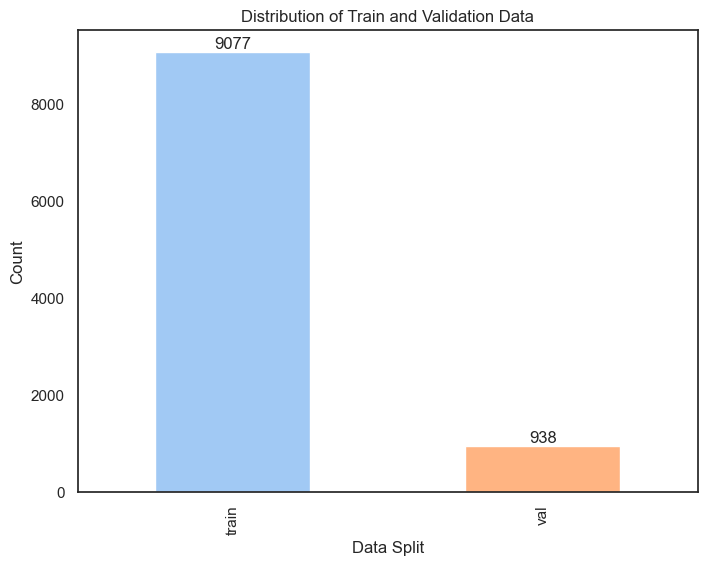

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


df_data['train_or_val'] = df_data['image_id'].apply(identify_val_rows)

# Count the occurrences of 'train' and 'val' in the 'train_or_val' column
train_val_counts = df_data['train_or_val'].value_counts()

# Plot the bar chart
sns.set(style="white")
plt.figure(figsize=(8, 6))
colors = sns.color_palette("pastel")
train_val_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.title('Distribution of Train and Validation Data')
plt.xlabel('Data Split')
plt.ylabel('Count')

# Add data labels on top of the bars
for i, count in enumerate(train_val_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

In [20]:
df_train['dx'].value_counts()
len(df_train)

9077

In [19]:
df_val['dx'].value_counts()

dx
nv       751
bkl       75
mel       39
bcc       30
akiec     26
vasc      11
df         6
Name: count, dtype: int64

In [20]:
print(df_data.columns)

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'duplicates', 'train_or_val'],
      dtype='object')


In [21]:

df_data.set_index('image_id', inplace=True, drop=False)

In [22]:
"""# Get a list of images in each of the two folders
import shutil

train_dir="D:/Desktop/Charma/char/train_dir"
val_dir="D:/Desktop/Charma/char/val_dir"
folder_1 = os.listdir("D:/Desktop/Charma/HAM10000_images_part_1")
folder_2 = os.listdir("D:/Desktop/Charma/HAM10000_images_part_2")

# Get a list of train and val images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])



# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join("D:/Desktop/Charma/HAM10000_images_part_1", fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join("D:/Desktop/Charma/HAM10000_images_part_2", fname)
        # destination path to image
        dst = os.path.join(train_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    if fname in folder_1:
        # source path to image
        src = os.path.join("D:/Desktop/Charma/HAM10000_images_part_1", fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)

    if fname in folder_2:
        # source path to image
        src = os.path.join("D:/Desktop/Charma/HAM10000_images_part_2", fname)
        # destination path to image
        dst = os.path.join(val_dir, label, fname)
        # copy the image from the source to the destination
        shutil.copyfile(src, dst)
    """

'# Get a list of images in each of the two folders\nimport shutil\n\ntrain_dir="D:/Desktop/Charma/char/train_dir"\nval_dir="D:/Desktop/Charma/char/val_dir"\nfolder_1 = os.listdir("D:/Desktop/Charma/HAM10000_images_part_1")\nfolder_2 = os.listdir("D:/Desktop/Charma/HAM10000_images_part_2")\n\n# Get a list of train and val images\ntrain_list = list(df_train[\'image_id\'])\nval_list = list(df_val[\'image_id\'])\n\n\n\n# Transfer the train images\n\nfor image in train_list:\n    \n    fname = image + \'.jpg\'\n    label = df_data.loc[image,\'dx\']\n    \n    if fname in folder_1:\n        # source path to image\n        src = os.path.join("D:/Desktop/Charma/HAM10000_images_part_1", fname)\n        # destination path to image\n        dst = os.path.join(train_dir, label, fname)\n        # copy the image from the source to the destination\n        shutil.copyfile(src, dst)\n\n    if fname in folder_2:\n        # source path to image\n        src = os.path.join("D:/Desktop/Charma/HAM10000_ima

In [22]:
# check how many train images we have in each folder
k="D:/Desktop/Charma/char/train/"
print(len(os.listdir(k+'nv')))
print(len(os.listdir(k+'mel')))
print(len(os.listdir(k+'bkl')))
print(len(os.listdir(k+'bcc')))
print(len(os.listdir(k+'akiec')))
print(len(os.listdir(k+'vasc')))
print(len(os.listdir(k+'df')))

5954
5920
5920
5858
5217
5290
4410


In [23]:
k="D:/Desktop/Charma/char/val/"
print(len(os.listdir(k+'nv')))
print(len(os.listdir(k+'mel')))
print(len(os.listdir(k+'bkl')))
print(len(os.listdir(k+'bcc')))
print(len(os.listdir(k+'akiec')))
print(len(os.listdir(k+'vasc')))
print(len(os.listdir(k+'df')))

751
39
75
30
26
11
6


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Your code using ImageDataGenerator goes here

class_list = ['mel','bkl','bcc','akiec','vasc','df']
base_dir="D:/Desktop/Charma/char"

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    # create a base dir
    aug_dir = 'augmnt_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir("D:/Desktop/Charma/char/train_dir/" + img_class)
     # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join("D:/Desktop/Charma/char/train_dir/" + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = "D:/Desktop/Charma/char/train_dir/" + img_class
     # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=(0.9,1.1),
        fill_mode='nearest')

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(path,
                                           save_to_dir=save_path,
                                           save_format='jpg',
                                                    target_size=(224,224),
                                                    batch_size=batch_size)
    
    # Generate the augmented images and add them to the training folders
    
    ###########
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    ###########
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create about 6000 augmented images
    for i in range(0,num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('augmnt_dir')"""

SyntaxError: incomplete input (3928066136.py, line 74)

In [25]:
# check how many train images we have in each folder
k="D:/Desktop/Charma/char/train/"
print(len(os.listdir(k+'nv')))
print(len(os.listdir(k+'mel')))
print(len(os.listdir(k+'bkl')))
print(len(os.listdir(k+'bcc')))
print(len(os.listdir(k+'akiec')))
print(len(os.listdir(k+'vasc')))
print(len(os.listdir(k+'df')))

5954
5920
5920
5858
5217
5290
4410


In [26]:
def plots(ims, figsize=(12,6), rows=5, interp=False, titles=None): # 12,6
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
        
plots(imgs, titles=None) # titles=labels will display the image labels

NameError: name 'imgs' is not defined

In [29]:

train_path = "D:/Desktop/Charma/char/train"
valid_path = "D:/Desktop/Charma/char/val"

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = 10
val_batch_size = 10
image_size = 224

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [30]:
from numpy.random import seed
seed(101)
import tensorflow as tf
tf.random.set_seed(101)


from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten


import pandas as pd
import numpy as np
#import keras
#from keras import backend as K

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

train_batches = datagen.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=train_batch_size
)

# Check the output shape of the labels in the first batch
print(train_batches)
print(train_batches[0][1].shape)

Found 38569 images belonging to 7 classes.
(10, 7)


In [32]:

datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

train_batches = datagen.flow_from_directory(
    train_path,
    target_size=(image_size, image_size),
    batch_size=train_batch_size
)

valid_batches = datagen.flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=val_batch_size
)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches = datagen.flow_from_directory(
    valid_path,
    target_size=(image_size, image_size),
    batch_size=1,
    shuffle=False
)


Found 38569 images belonging to 7 classes.
Found 938 images belonging to 7 classes.
Found 938 images belonging to 7 classes.


In [33]:

import tensorflow as tf
mobile = tf.keras.applications.mobilenet.MobileNet()

In [34]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [35]:
# How many layers does MobileNet have?
len(mobile.layers)

91

In [36]:

from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.models import Model

# Assuming 'mobile' is your pre-trained model
x = mobile.layers[-6].output

# Create a new dense layer for predictions
# 7 corresponds to the number of classes
x = Dropout(0.25)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(7, activation='softmax')(x)

# inputs=mobile.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.
model = Model(inputs=mobile.input, outputs=predictions)

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [38]:
# We need to choose how many layers we actually want to be trained.

# Here we are freezing the weights of all layers except the
# last 23 layers in the new model.
# The last 23 layers of the model will be trained.

for layer in model.layers[:-23]:
    layer.trainable = False

In [39]:
# Define Top2 and Top3 Accuracy

from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy

def top_3_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)

def top_2_accuracy(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=2)

In [40]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',top_3_accuracy])

In [41]:
print(valid_batches.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [42]:
#Add weights to try to make the model more sensitive to melanoma

class_weights={
    0: 1.0, # akiec
    1: 1.0, # bcc
    2: 1.0, # bkl
    3: 1.0, # df
    4: 3.0, # mel # Try to make the model more sensitive to Melanoma.
    5: 1.0, # nv
    6: 1.0, # vasc
}

In [ ]:

from tensorflow.keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# ... (Your existing code)

# Define the model checkpoint callback to save the model
checkpoint = ModelCheckpoint('your_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

# Other callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-6, mode='min', verbose=1)

class Top3AccuracyCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        x_val, y_val = self.validation_data
        y_val_pred = self.model.predict(x_val)
        #top3_acc = top_3_accuracy(y_val, y_val_pred).numpy()
        #logs['val_top_3_accuracy'] = top3_acc
        #print(f'val_top_3_accuracy: {top3_acc}')

# Use the custom callback in your callbacks list
#top3_accuracy_callback = Top3AccuracyCallback(validation_data=(valid_batches, valid_batches.labels))
#callbacks_list = [checkpoint, reduce_lr, top3_accuracy_callback]

# Then, use callbacks_list in model.fit
history = model.fit(train_batches, steps_per_epoch=train_steps,
                    class_weight=class_weights,
                    validation_data=valid_batches,
                    validation_steps=val_steps,
                    epochs=50, verbose=1,
                    #callbacks=callbacks_list
                   )

# Save the final model after training
model.save('your_model_final.h5')


Epoch 1/50


104/908 [==>...........................] - ETA: 2:17 - loss: 2.2193 - accuracy: 0.4452 - top_3_accuracy: 0.8096

In [ ]:
model.save('charma_main_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = tf.keras.models.load_model('your_model_final.h5')

# Load and preprocess the new input image
img_path = "D:/Desktop/Charma/char/train/vasc/_0_4384086.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)

# Make predictions using the loaded model
predictions = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Print the predicted class and its corresponding probability
print(f'Predicted Class: {predicted_class_index}')
print(f'Probability: {predictions[0][predicted_class_index]}')
